In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Sales.csv')
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [3]:
## Cek Summary info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [4]:
## Cek Missing Value
df.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [5]:
## Cek Datatypes
df.dtypes

Date                object
Day                  int64
Month               object
Year                 int64
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
Profit               int64
Cost                 int64
Revenue              int64
dtype: object

In [6]:
dfDesc = []
for i in df.columns:
    dfDesc.append([i, 
                   df[i].dtypes, 
                   df[i].isna().sum(),
                   round(((df[i].isna().sum() / len(df)) * 100), 2),
                   df[i].nunique(),
                   df[i].drop_duplicates().sample(2).values
    ])
pd.DataFrame(
data=dfDesc,
columns = [
    'features',
    'DataType',
    'Null',
    'NullPercentage',
    'Unique',
    'Unique Sample'
])

,features,DataType,Null,NullPercentage,Unique,Unique Sample
0,Date,object,0,0.0,1884,"[2012-08-31, 2011-12-23]"
1,Day,int64,0,0.0,31,"[18, 24]"
2,Month,object,0,0.0,12,"[November, June]"
3,Year,int64,0,0.0,6,"[2014, 2013]"
4,Customer_Age,int64,0,0.0,70,"[66, 69]"
5,Age_Group,object,0,0.0,4,"[Young Adults (25-34), Adults (35-64)]"
6,Customer_Gender,object,0,0.0,2,"[M, F]"
7,Country,object,0,0.0,6,"[France, United States]"
8,State,object,0,0.0,53,"[Seine (Paris), Garonne (Haute)]"
9,Product_Category,object,0,0.0,3,"[Bikes, Clothing]"


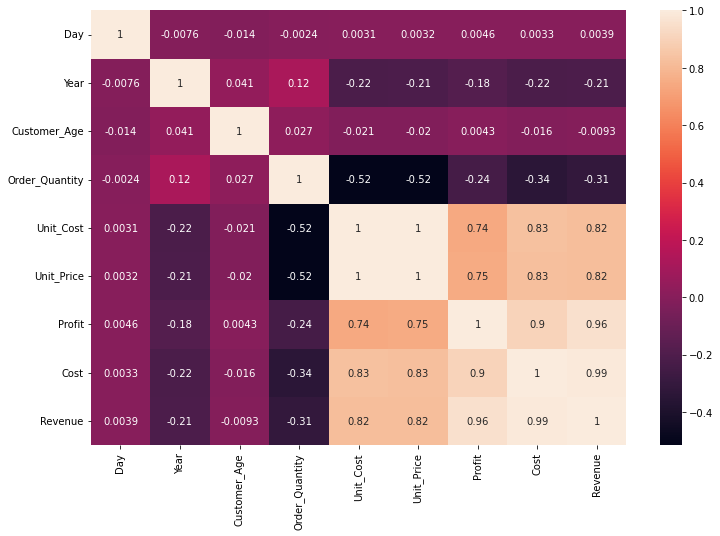

In [7]:
## Cek Korelasi
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Data Preparation

In [8]:
## Data Types Conversion
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.info() ## Recheck DType

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [10]:
buy_dt = df['Date'].dt

## Adding features __Month__ and __Day__

In [11]:
df['Month'] = buy_dt.month

In [12]:
df['Day'] = buy_dt.day

In [13]:
df.drop(columns='Date', inplace=True)

In [14]:
df.head()

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26,11,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,26,11,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,23,3,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,23,3,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,15,5,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [15]:
df.to_csv('Clean.csv', index=False)

## Data Vizualization made in Tableau

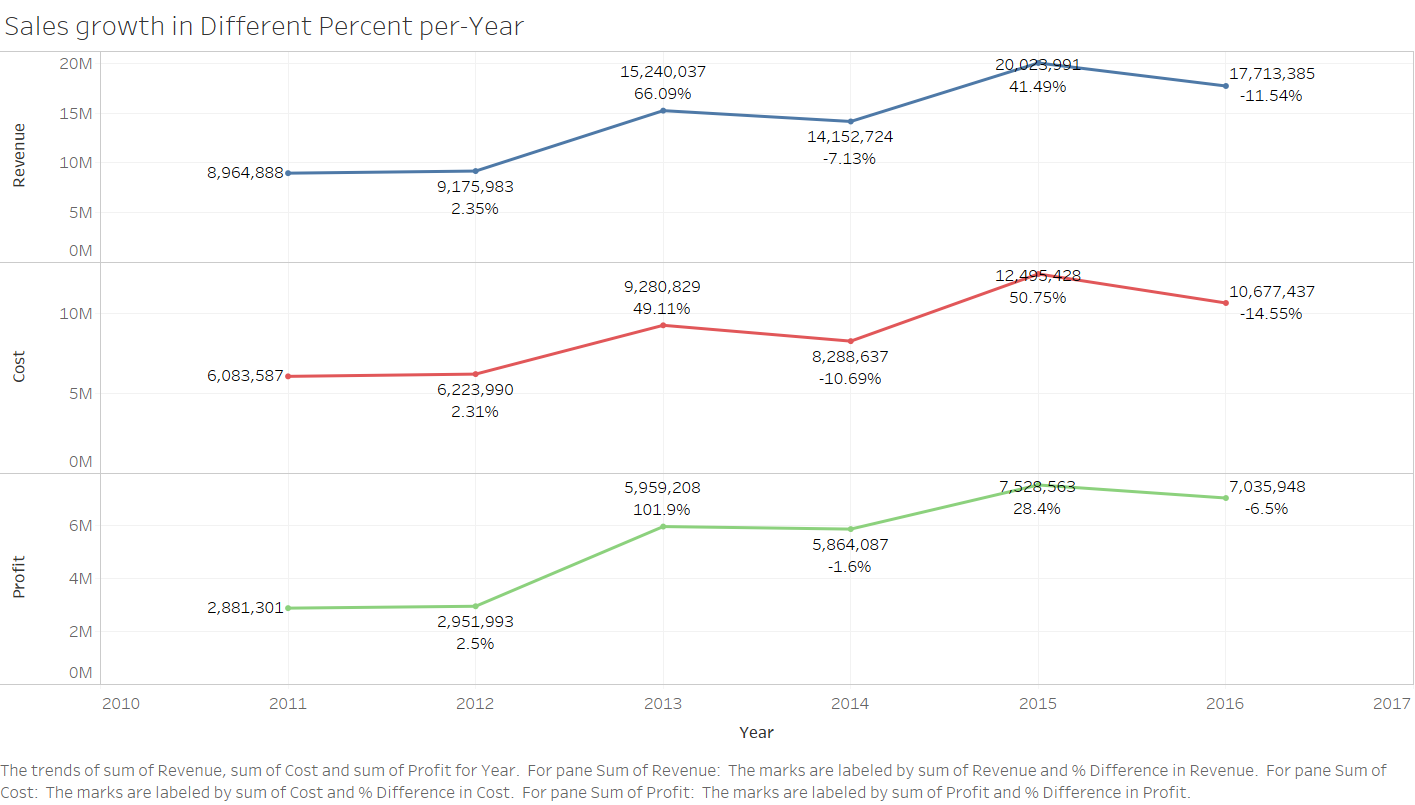

Insight : 
- Kenaikan Revenue terbesar terjadi pada tahun 2013 yaitu sebesar 66.09% dari tahun sebelumnya
- Kenaikan Cost terbesar terjadi pada tahun 2015 yaitu sebesar 50.75% dari tahun sebelumnya
- Kenaikan Profit terbesar terjadi pada tahun 2013 yaitu sebesar 101.9% dari tahun sebelumnya

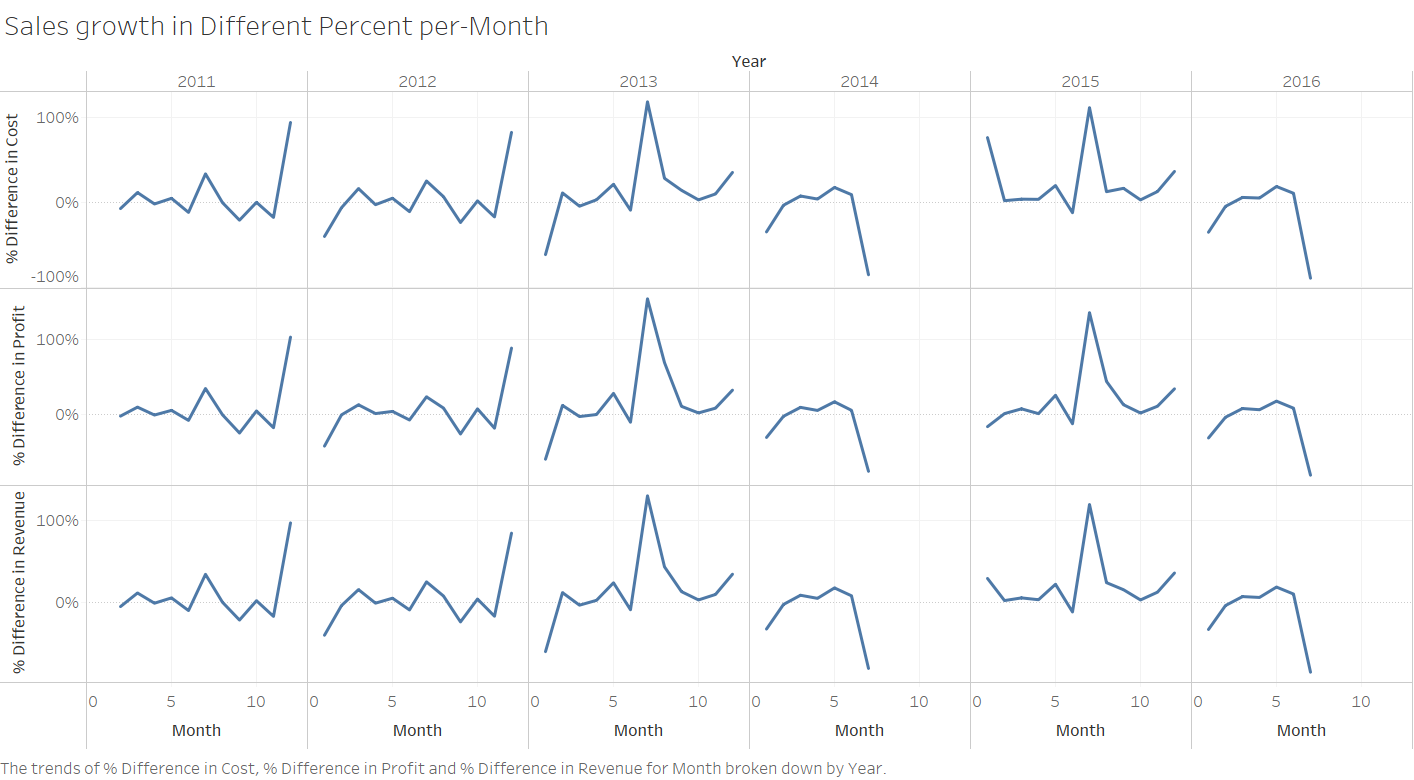

Insight :
- Kenaikan pesat terjadi pada bulan 12 di tahun 2011 dan 2012, dan bulan 7 di tahun 2013 dan 2015
- Penurunan pesat terjadi pada bulan 7 di tahun 2014 dan 2016
- Tidak adanya data Bulan setelah bulan 7 pada tahun 2014 dan 2016 sehingga tidak dapat dilihat bagaimana perkembangannya

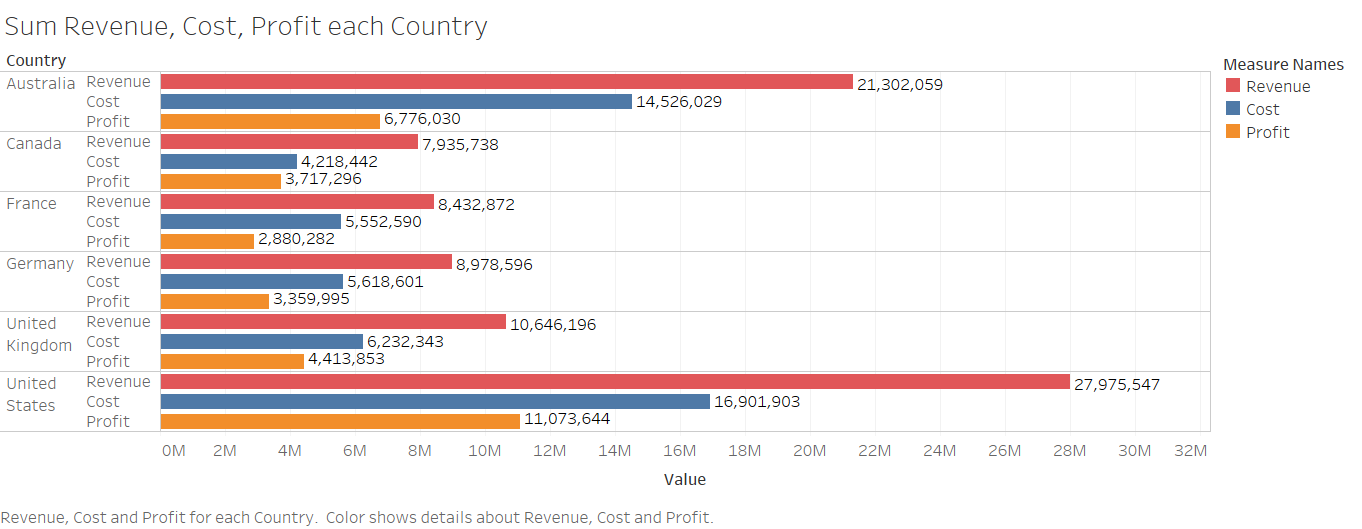

Insight :
- Revenue terbesar ada pada negara United States dan Australia
- Meskipun Revenue tinggi tetapi jika Cost juga tinggi maka Profit yang di dapat akan sedikit, 
  seperti contohnya perbandingan Canada dan Germany

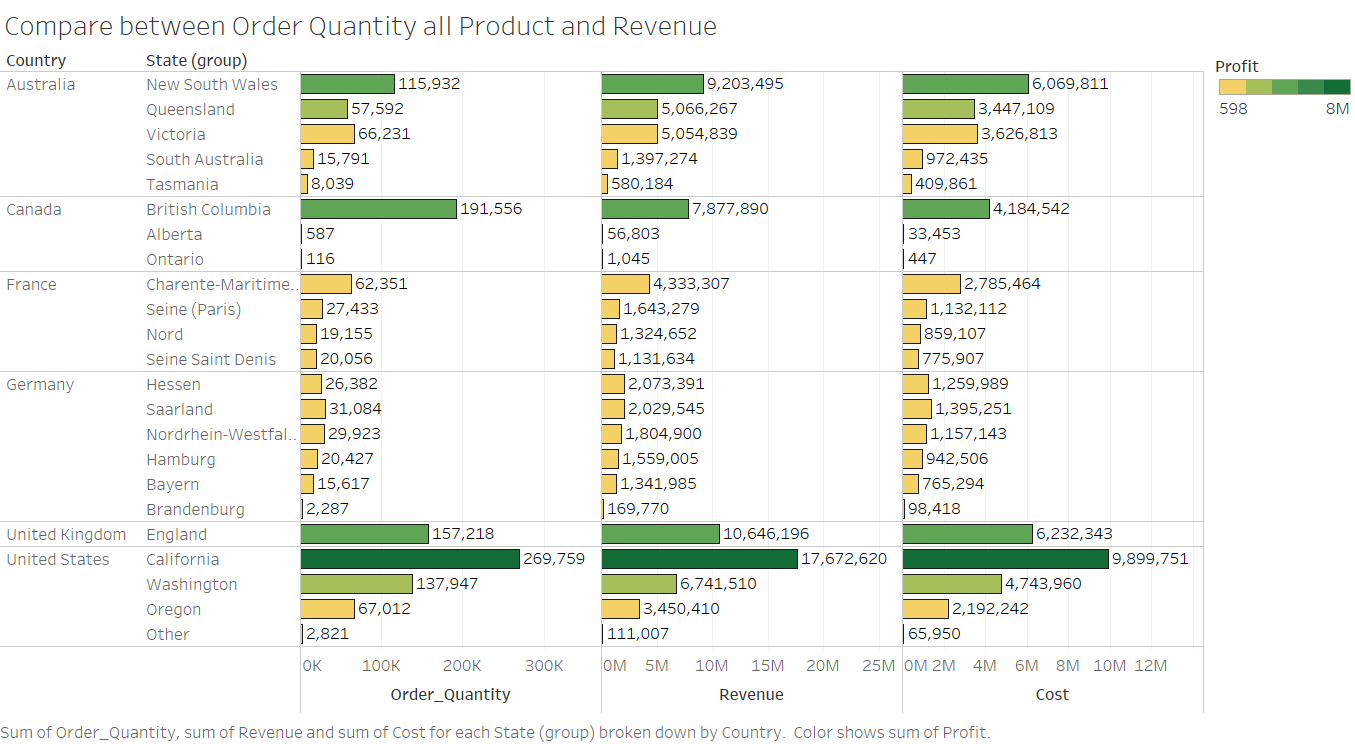

Insight : 
- State California memiliki Order Quantity terbanyak dan Revenue, Cost serta Profit terbanyak
- State British Columbia memiliki Order Quantity lebih banyak dari State England, tetapi Revenue England lebih tinggi dari British
      Columbia

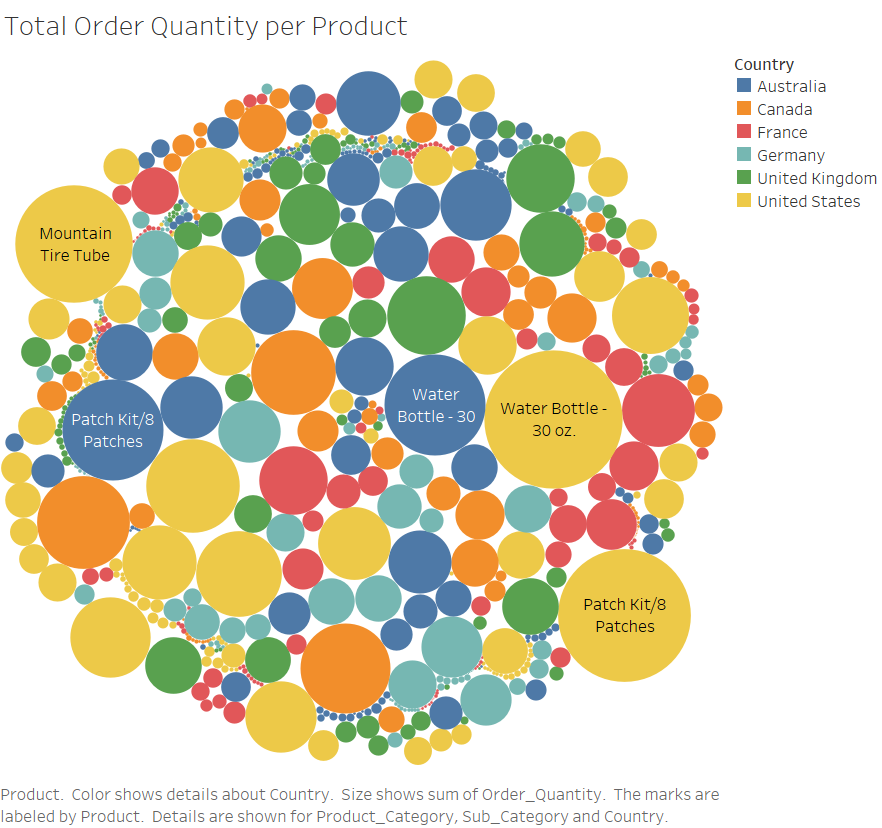

Insight :
- Order Quantity terbanyak di setiap Negara adalah Product Patch Kit/8 Patches, Mountain Tire Tube dan Water Bottle-30 oz

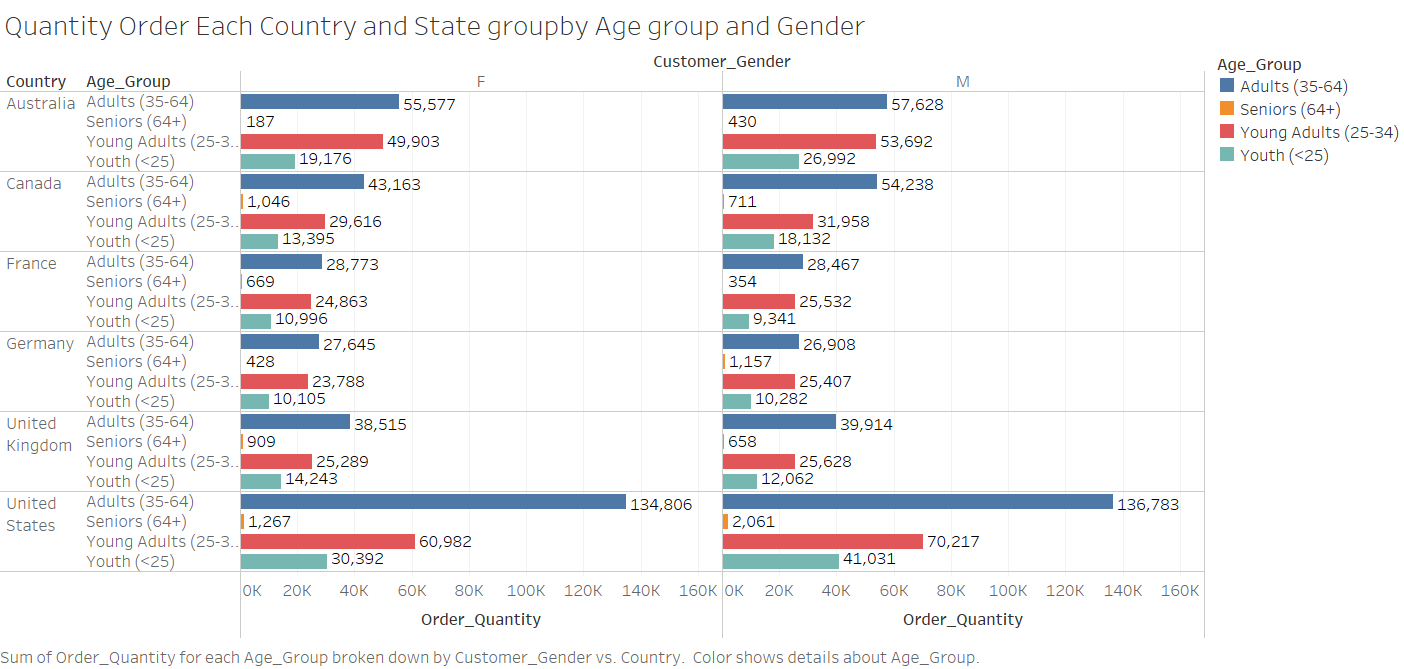

Insight :
- Order Quantity terbanyak berasal dari pembeli Adults(35-64) Male/Pria dan Adults(35-64) Female/Wanita di United States

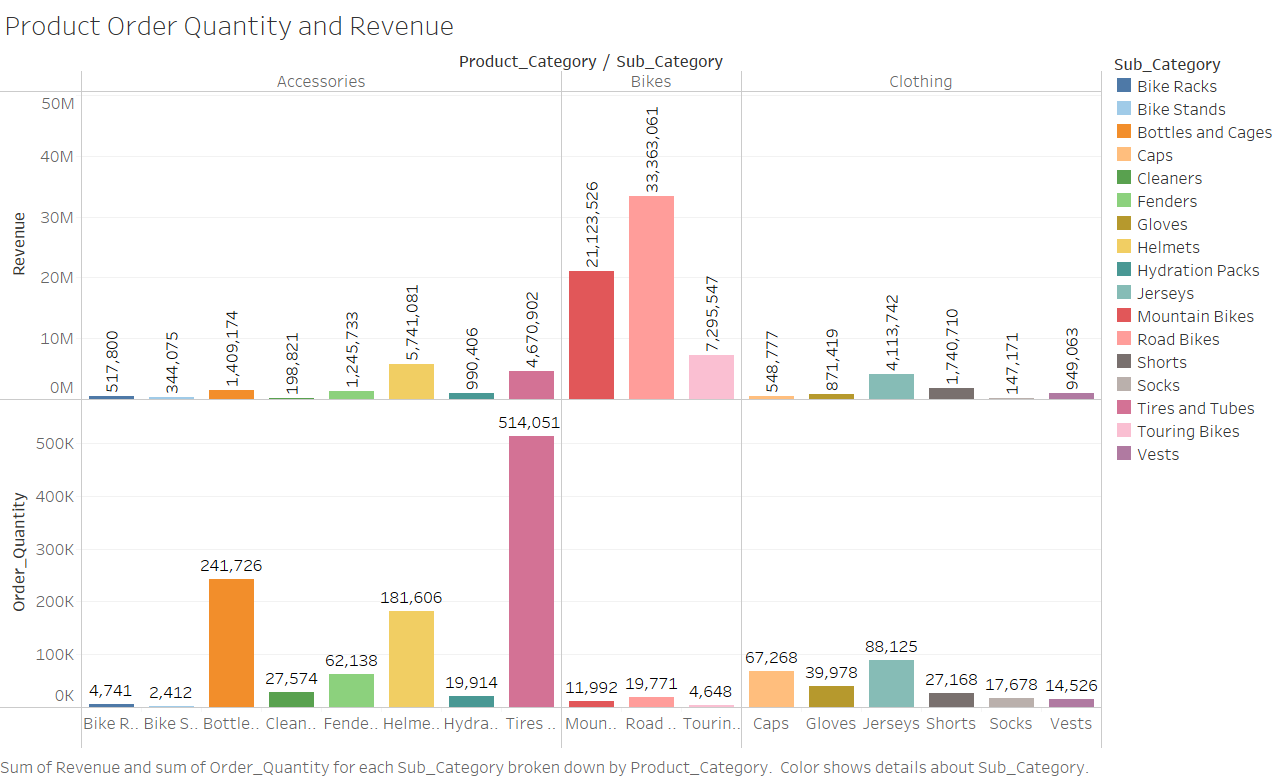

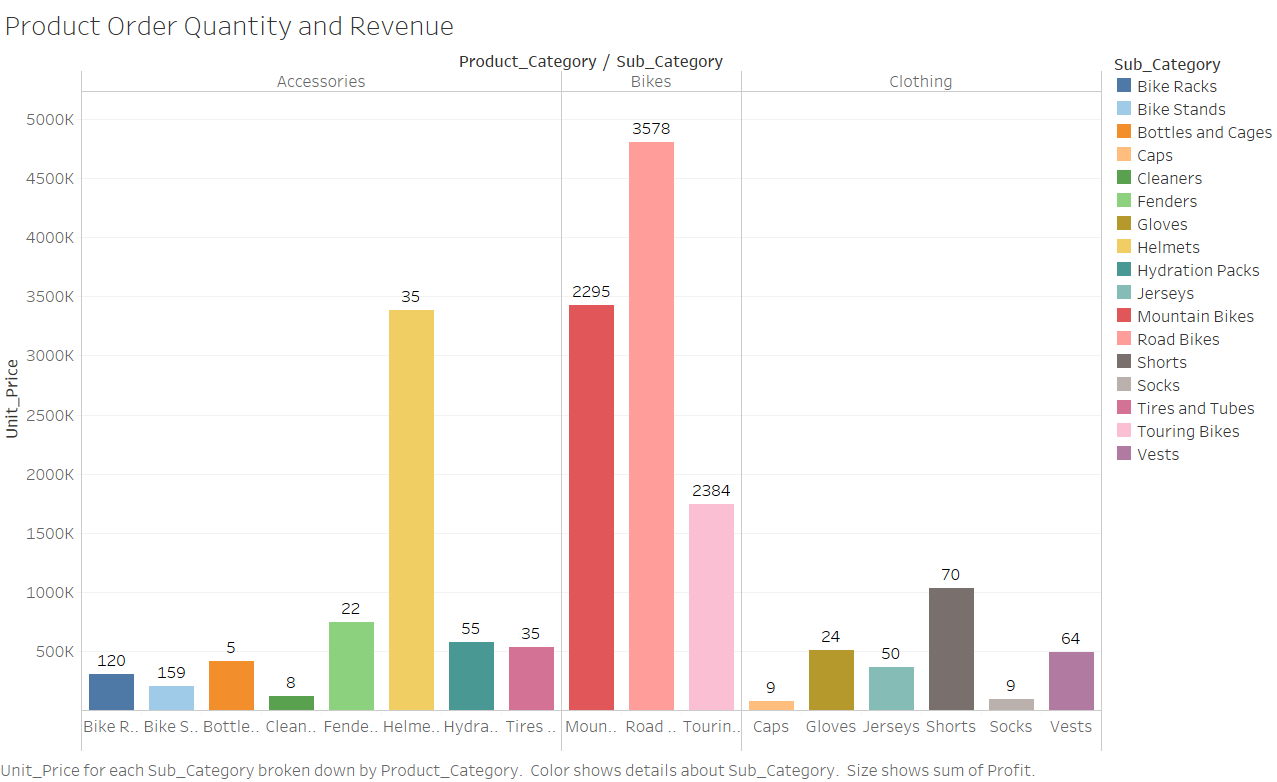

Insight :
- Order Quantity Terbanyak ada pada Product Category Tires and Tubes, Bottle and cages, dan Helmets
- Tetapi pada Revenue Terbesar ada pada Product Category Road Bikes, Mountain Bikes, dan Touring Bikes
- Hal ini karena Unit Price dari Road Bikes, Mountain Bikes, dan Touring Bikes lebih besar 
      dibandingkan dengan Tires and Tubes, Bottle and cages, dan Helmets

## Conclusion and Recommendation

- Penjualan Terbesar terjadi di Negara United States yang mayoritas pembelinya adalah Adult Male dan Adult Female sehingga hal ini dapat dimanfaatkan dengan menjual Produk sesuai dengan hal trending yang terjadi disana sesuai dengan selera Adult Age
- Product dengan Order Quantity yang tinggi dapat dipengaruhi oleh Unit Price yang rendah sehingga meskipun Order Quantity tinggi tetapi Revenue sedikit, sehingga untuk pemesanan barang dapat disesuaikan dengan Order Quantity yang sudah dibahas
- Profit akan semakin tinggi jika Revenue Tinggi sedangkan Cost Rendah